In [1]:
import os
os.chdir("/Users/JackVoigt/Documents Local/MSIA Files/CSC 605")
import pandas as pd
import numpy as np
pd.options.display.max_rows = 100
pd.options.display.max_columns = 150
import plotly as ply
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [3]:
titanic = pd.read_excel("titanic.xls")

## For this assignment, we will once again be using the titanic dataset. This assignment revolves around building visualizations with our data.

In [4]:
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


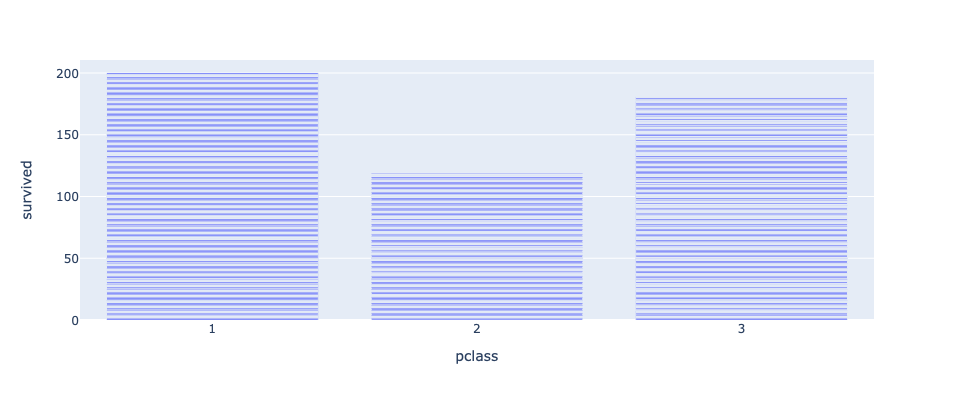

In [5]:
fig1 = px.bar(titanic, x="pclass", y="survived", barmode = 'group', 
             height=400)
fig1.show()

## Above we have construted a bar chart to show the number of survivors based on their class on the titanic, whether that be first, second or third.

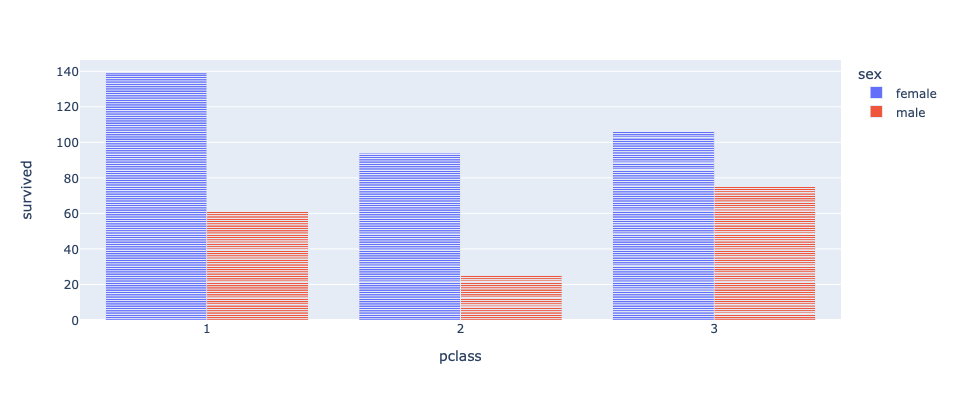

In [6]:
fig2 = px.bar(titanic, x="pclass", y="survived", barmode = 'group', color = 'sex',
             height=400)
fig2.show()

## Now we construct another vertical bar chart, this time displaying the number of passengers who survived seperated by class and sex.

In [7]:
fig3_df = titanic

In [8]:
fig3_df = titanic.groupby(by=['pclass', 'sex', 'survived']).count().reset_index()

In [9]:
fig3_df

,pclass,sex,survived,name,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,female,0,5,5,5,5,5,5,5,5,0,0,5
1,1,female,1,139,128,139,139,139,139,116,137,138,0,116
2,1,male,0,118,98,118,118,118,118,84,118,2,35,109
3,1,male,1,61,53,61,61,61,61,51,61,61,0,59
4,2,female,0,12,11,12,12,12,12,1,12,0,1,12
5,2,female,1,94,92,94,94,94,94,12,94,86,0,92
6,2,male,0,146,135,146,146,146,146,5,146,1,30,132
7,2,male,1,25,23,25,25,25,25,5,25,25,0,25
8,3,female,0,110,80,110,110,110,110,2,110,1,7,30
9,3,female,1,106,72,106,106,106,106,5,106,94,0,33


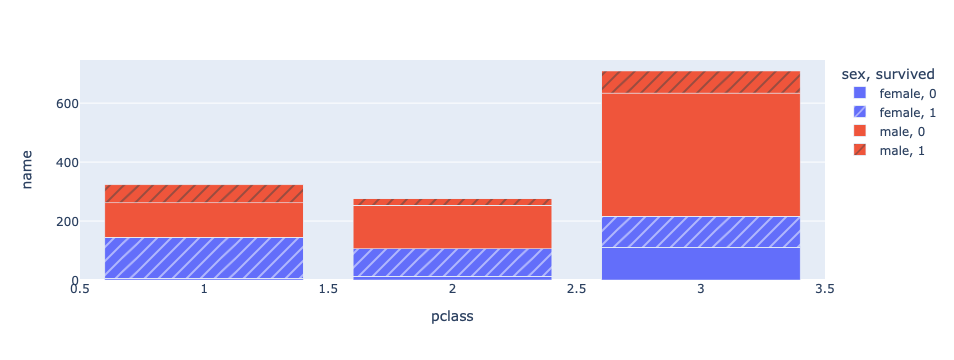

In [10]:
fig3 = px.bar(fig3_df, x="pclass", y="name", color="sex", pattern_shape="survived")
fig3

## Above we can see a stacked bar chart for counts of survived and dead at different classes and sex. 

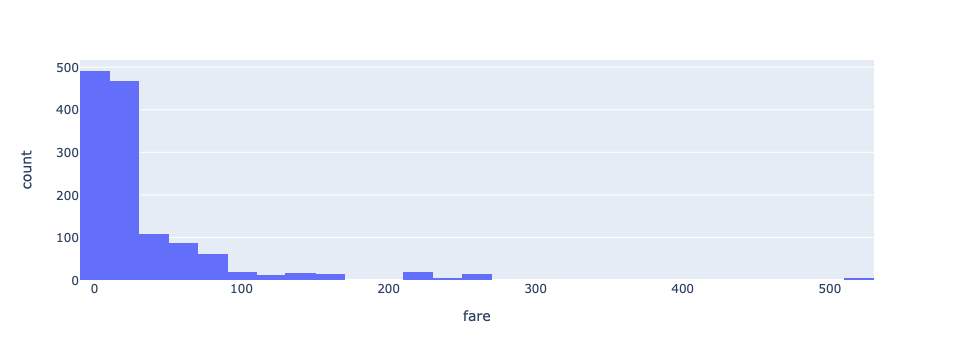

In [11]:
fig4 = px.histogram(titanic, x="fare",nbins = 30)
fig4.show()

## Here we visualize a histogram for our variable fare. We see a right skew in this visual.

In [12]:
titanic = titanic[titanic['fare'].notna()]

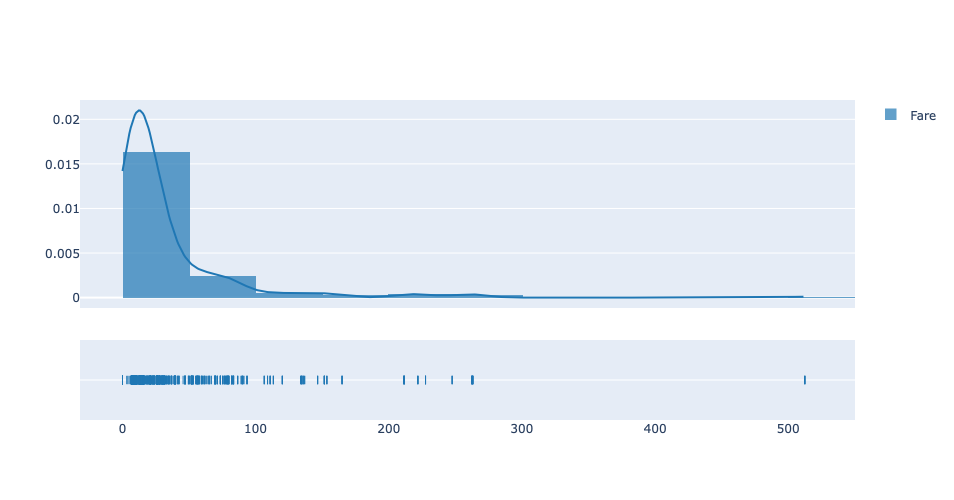

In [25]:
fig5 = ff.create_distplot(hist_data = [titanic.fare.values.tolist()], group_labels = ["Fare"], bin_size = 50)
fig5.update_layout(
    autosize=False,
    width=900,
    height=500)
fig5.show()

## Above we see a KDE plot on top of our histogram for the same variable, fare.

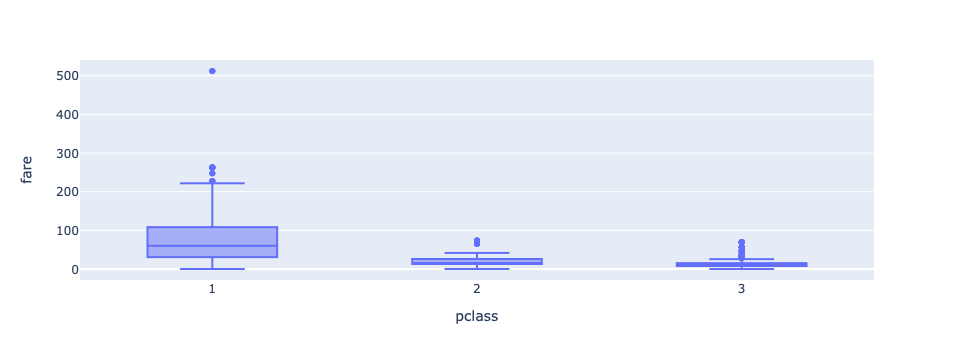

In [14]:
fig6 = px.box(titanic, x="pclass", y="fare")
fig6.show()

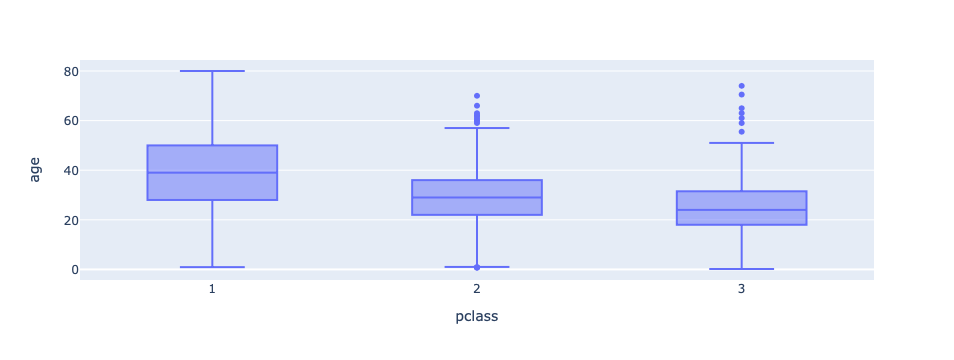

In [15]:
fig7 = px.box(titanic, x="pclass", y="age")
fig7.show()

## Above we constructed box plots for the classes of the passengers' fares and ages. We can see that both fare and age are highest in first class and decrease as you go from first to second and second to third.